In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the final results
test_df = pd.read_csv("svm/test_with_svm_anomalies.csv")
predict_df = pd.read_csv("svm/predict_with_svm_anomalies.csv")

# Check anomalies count
print("Anomalies in Test Dataset:", test_df['is_anomalous'].sum())
print("Anomalies in Predict Dataset:", predict_df['is_anomalous'].sum())

# Display a few anomalies
print("Sample Anomalies in Test Data:")
print(test_df[test_df['is_anomalous'] == True].head())

print("Sample Anomalies in Predict Data:")
print(predict_df[predict_df['is_anomalous'] == True].head())


Anomalies in Test Dataset: 748
Anomalies in Predict Dataset: 250
Sample Anomalies in Test Data:
                   timestamp log_level                          source  \
28   2017-05-16 00:00:30.788      INFO  nova.osapi_compute.wsgi.server   
78   2017-05-16 00:01:12.693      INFO  nova.osapi_compute.wsgi.server   
104  2017-05-16 00:01:31.811      INFO  nova.osapi_compute.wsgi.server   
120  2017-05-16 00:01:52.949      INFO  nova.osapi_compute.wsgi.server   
162  2017-05-16 00:02:34.773      INFO  nova.osapi_compute.wsgi.server   

                               request_id                           user_id  \
28   6a763803-4838-49c7-814e-eaefbaddee9d  113d3a99c3da401fbd62cc2caa5b96d2   
78   97fcea79-42f7-4241-9b9e-63fe193c1929  113d3a99c3da401fbd62cc2caa5b96d2   
104  1c33bdb8-a945-437c-a2a4-836c25c502ef  113d3a99c3da401fbd62cc2caa5b96d2   
120  caeb3818-dab6-4e8d-9ea6-aceb23905ebc  113d3a99c3da401fbd62cc2caa5b96d2   
162  d38f479d-9bb9-4276-9688-52607e8fd350  113d3a99c3da401fbd62c

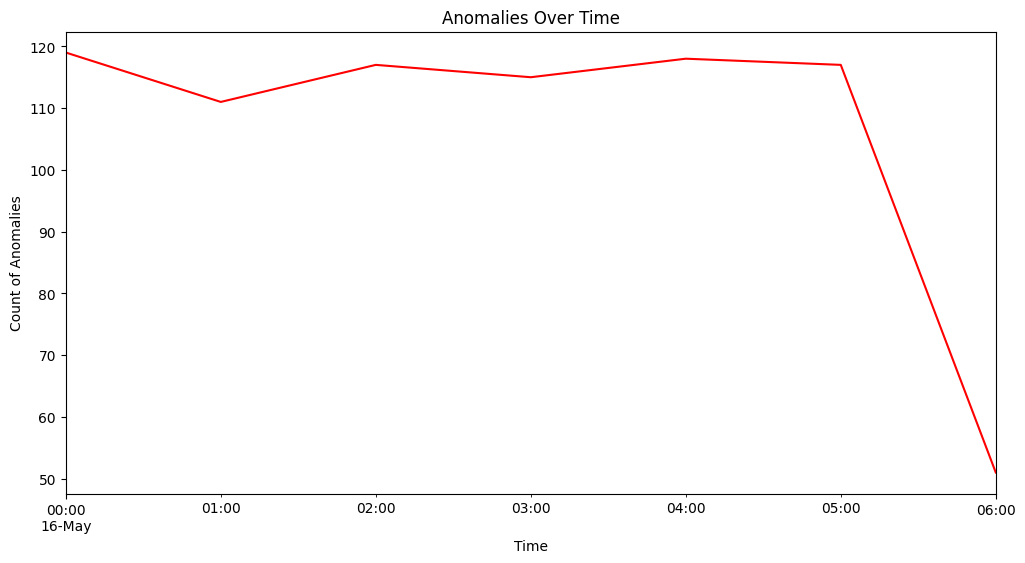

In [11]:
# Convert timestamp to datetime
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'], errors='coerce')

# Group anomalies by time
anomalies_over_time = test_df[test_df['is_anomalous'] == True].resample('H', on='timestamp').size()

# Plot anomalies over time
plt.figure(figsize=(12, 6))
anomalies_over_time.plot(kind='line', color='red', title='Anomalies Over Time')
plt.xlabel('Time')
plt.ylabel('Count of Anomalies')
plt.show()


/var/folders/wk/l8__rsrn5v73832q54dxsh480000gn/T/ipykernel_37256/530882960.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=anomalous_status, palette='coolwarm')


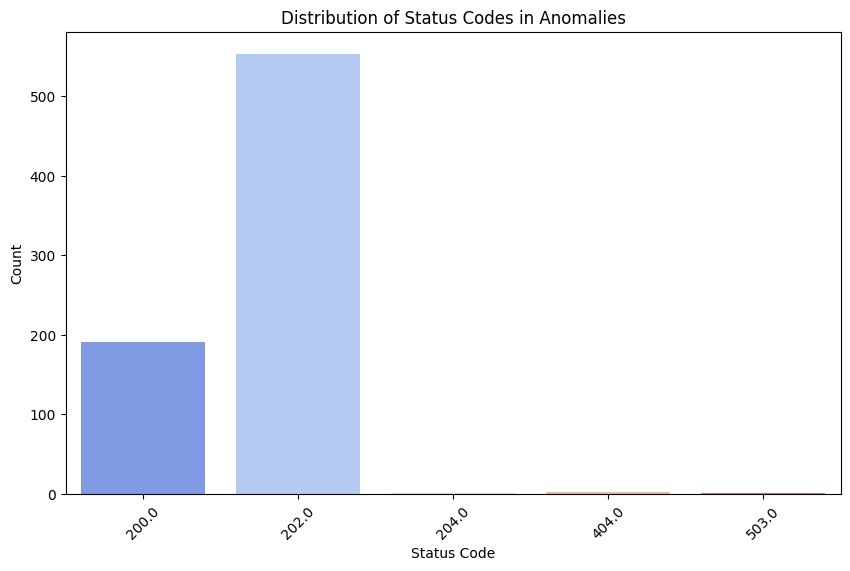

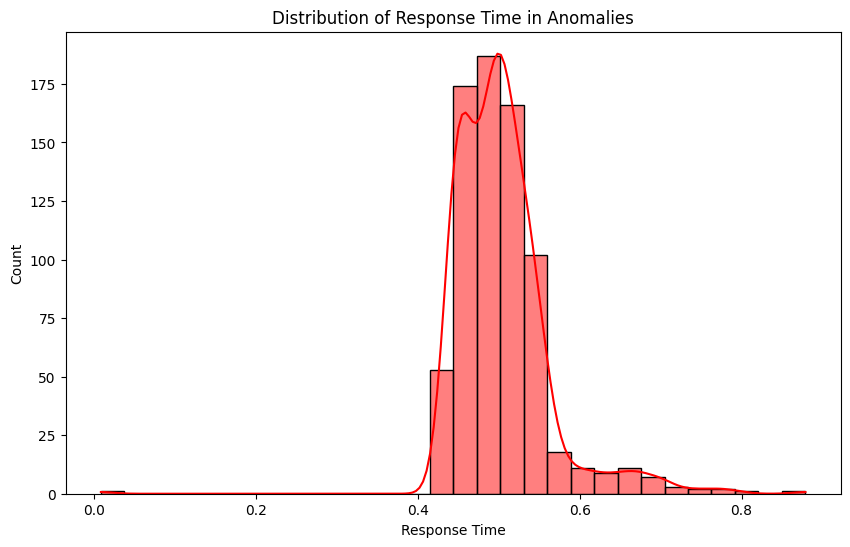

In [14]:
# Anomalous status codes
anomalous_status = test_df[test_df['is_anomalous'] == True]['status_code']

# Plot distribution of status codes
plt.figure(figsize=(10, 6))
sns.countplot(x=anomalous_status, palette='coolwarm')
plt.title("Distribution of Status Codes in Anomalies")
plt.xlabel("Status Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot response time of anomalies
plt.figure(figsize=(10, 6))
sns.histplot(test_df[test_df['is_anomalous'] == True]['response_time'], kde=True, bins=30, color='red')
plt.title("Distribution of Response Time in Anomalies")
plt.xlabel("Response Time")
plt.show()

